<a href="https://colab.research.google.com/github/BPOTHIREDDYGARI/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Global Health Impact Analysis: Nutrition, Influenza, and COVID-19


---



The focus of this investigation is COVID-19 and influenza! It examines how these illnesses impact our bodies and how our diets can have an impact. The aim of this research is to investigate the national level relationship between diet and infectious illnesses. It seeks to provide us with an understanding of the relationship between these illnesses and the foods we eat. The goal of the study is to provide us with useful data that medical professionals may utilize to make informed decisions about our care. It also aims to stimulate further research in this crucial field by examining the relationship between our diet and health.

## Data Source:


- COVID-19 Data: Loaded from the [Johns Hopkins CSSE GitHub repository](https://github.com/CSSEGISandData/COVID-19).
- Influenza Data: Loaded from a local file named 'influenza_weekly.csv'.
 Local file was collected from kaggle.
 link:https://www.kaggle.com/datasets/lachmann12/weekly-influenza-reports-by-country
- Nutrition Data: Loaded from a local file named 'country-Nutrition.csv'.
 Local file was collected from https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

  Dataset saved to drive :
   
   Nutrition Data:https://drive.google.com/file/d/1uyVBRj1GiZoGZFOAal1FdlXZrry55Y9A/view?usp=drive_link
   
   Influenza Data:https://drive.google.com/file/d/13Elv1mONQOjvx4QOtXPlbZjv-bFbBMad/view?usp=drive_link


# Import the Library

In [102]:
## Load the necessary  libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 ## Loading the datasets.



In [103]:
# Load COVID-19 Data
covid_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_data = pd.read_csv(covid_url)


# Load Influenza Data
influenza_data = pd.read_csv('influenza_weekly.csv')

# Load Nutrition Data
nutrition_data = pd.read_csv('country-Nutrition.csv')

# Handling missing values
covid_data.fillna(0, inplace=True)
influenza_data.fillna(influenza_data.mean(), inplace=True)
nutrition_data.fillna(nutrition_data.mean(), inplace=True)

<ipython-input-103-193625f3ad0c>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  influenza_data.fillna(influenza_data.mean(), inplace=True)
<ipython-input-103-193625f3ad0c>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  nutrition_data.fillna(nutrition_data.mean(), inplace=True)


In [104]:
# Check the first few rows to confirm data is loaded
covid_data = pd.read_csv(covid_url)
print(covid_data.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

##COVID-19 Data Transformation
Melting the DataFrame to convert date columns into rows.Aggregating cases by country.Plotting the top 20 countries by COVID-19 cases.
Nutrition Data Overview:Displaying the first few rows of the nutrition data.
Influenza Data Overview:Displaying the first few rows of the influenza data.

In [105]:
# Melting the DataFrame
covid_data_long = covid_data.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"],
                                  var_name="Date",
                                  value_name="Cases")
# Checking  the transformation
print(covid_data_long.head())

  Province/State Country/Region       Lat       Long     Date  Cases
0            NaN    Afghanistan  33.93911  67.709953  1/22/20      0
1            NaN        Albania  41.15330  20.168300  1/22/20      0
2            NaN        Algeria  28.03390   1.659600  1/22/20      0
3            NaN        Andorra  42.50630   1.521800  1/22/20      0
4            NaN         Angola -11.20270  17.873900  1/22/20      0


In [106]:
# Assuming covid_data_long is the long format of your data
covid_cases_by_country = covid_data_long.groupby('Country/Region')['Cases'].sum().reset_index()
print(covid_cases_by_country.head())


  Country/Region      Cases
0    Afghanistan  129988469
1        Albania  185562654
2        Algeria  182741650
3        Andorra   24547525
4         Angola   60025203


# checking if the dataframe is properly defined or not

<Figure size 1000x600 with 0 Axes>

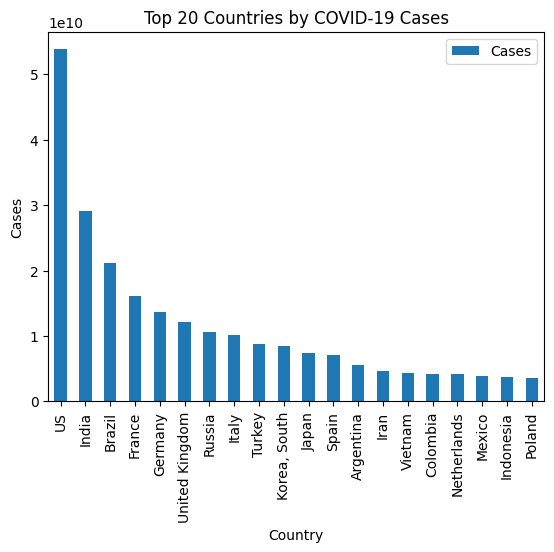

In [107]:
if not covid_cases_by_country.empty:
    # Plotting
    plt.figure(figsize=(10, 6))
    covid_cases_by_country.sort_values(by='Cases', ascending=False).head(20).plot(kind='bar', x='Country/Region', y='Cases')
    plt.title('Top 20 Countries by COVID-19 Cases')
    plt.xlabel('Country')
    plt.ylabel('Cases')
    plt.show()
else:
    print("The DataFrame is still empty. Check the data loading and transformation steps.")

In [108]:
# Display the  Nutrition data
print("Nutrition Data:")
print(nutrition_data.head())

Nutrition Data:
       Country  Income Classification  Severe Wasting    Wasting  Overweight  \
0  AFGHANISTAN                    0.0        3.033333  10.350000    5.125000   
1      ALBANIA                    2.0        4.075000   7.760000   20.800000   
2      ALGERIA                    2.0        2.733333   5.942857   12.833333   
3       ANGOLA                    1.0        2.400000   6.933333    2.550000   
4    ARGENTINA                    2.0        0.200000   2.150000   11.125000   

    Stunting  Underweight  U5 Population ('000s)  
0  47.775000    30.375000            4918.561500  
1  24.160000     7.700000             232.859800  
2  19.571429     7.342857            3565.213143  
3  42.633333    23.600000            3980.054000  
4  10.025000     2.600000            3613.651750  


In [109]:
print("Influenza Data:")
print(influenza_data.head())


Influenza Data:
   REPORT_ID      Country                            WHOREGION      FLUREGION  \
0       1048  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   
1       1059  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   
2       1060  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   
3       1061  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   
4       1062  Afghanistan  Eastern Mediterranean Region of WHO  Southern Asia   

   Year  Week       SDATE       EDATE  SPEC_RECEIVED_NB  SPEC_PROCESSED_NB  \
0  2015     5  2015-01-26  2015-02-01              43.0               43.0   
1  2015    16  2015-04-13  2015-04-19              22.0               22.0   
2  2015    17  2015-04-20  2015-04-26              26.0               26.0   
3  2015    18  2015-04-27  2015-05-03              17.0               17.0   
4  2015    19  2015-05-04  2015-05-10              23.0               23.0   

   ...  AH5  ANOTSUBTYPED  I

**Data Exploration and Cleaning:**

Merging COVID-19, influenza, and nutrition datasets based on the 'Country' column.Standardizing country names and handling common missing values.
Creating a comprehensive DataFrame for further analysis.





In [110]:
def clean_covid_data(df):
    # Drop unnecessary columns
    df = df.drop(columns=['Province/State', 'Lat', 'Long'])

    # Melting the dataframe to convert date columns into rows
    df = df.melt(id_vars=["Country/Region"],
                 var_name="Date",
                 value_name="Cases")

    # Convert 'Date' from string to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Group by Date and Country, summing cases
    df = df.groupby(['Country/Region', 'Date'])['Cases'].sum().reset_index()

    return df

covid_data_clean = clean_covid_data(covid_data)
covid_data_clean

,Country/Region,Date,Cases
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0
...,...,...,...
229738,Zimbabwe,2023-03-05,264127
229739,Zimbabwe,2023-03-06,264127
229740,Zimbabwe,2023-03-07,264127
229741,Zimbabwe,2023-03-08,264276


In [111]:
# Check for missing values
print("Missing values in each column:")
print(nutrition_data.isnull().sum())

# Convert 'Income Classification' to a categorical type
nutrition_data['Income Classification'] = nutrition_data['Income Classification'].astype('category')

# You might want to rename the countries to match the naming in other datasets
#nutrition_data['Country'] = nutrition_data['Country'].apply(lambda x: rename_country(x))

# Checking the data types
print("\nData types after conversion:")
print(nutrition_data.dtypes)

Missing values in each column:
Country                  0
Income Classification    0
Severe Wasting           0
Wasting                  0
Overweight               0
Stunting                 0
Underweight              0
U5 Population ('000s)    0
dtype: int64

Data types after conversion:
Country                    object
Income Classification    category
Severe Wasting            float64
Wasting                   float64
Overweight                float64
Stunting                  float64
Underweight               float64
U5 Population ('000s)     float64
dtype: object


In [112]:
# Preprocess and clean datasets
# COVID-19 Data: Aggregate by country and get latest total cases
covid_data_latest = covid_data.groupby('Country/Region').agg('last')
covid_data_latest.reset_index(inplace=True)
covid_data_latest = covid_data_latest[['Country/Region', covid_data_latest.columns[-1]]]
covid_data_latest.columns = ['Country', 'Total COVID-19 Cases']
covid_data_latest.head()

,Country,Total COVID-19 Cases
0,Afghanistan,209451
1,Albania,334457
2,Algeria,271496
3,Andorra,47890
4,Angola,105288


## Aggregating and creating a pivot data for infleunza and covid datasets
**bold text**

>



In [113]:
# Create a new column for total influenza cases
relevant_columns = ['AH1', 'AH1N12009', 'AH3', 'AH5', 'ANOTSUBTYPED', 'INF_A', 'BYAMAGATA', 'BVICTORIA', 'BNOTDETERMINED', 'INF_B']
influenza_data['Total_Cases'] = influenza_data[relevant_columns].sum(axis=1)

# Pivot the data
influenza_pivot = influenza_data.pivot_table(index='Country', columns='Week', values='Total_Cases', aggfunc='sum')
influenza_pivot

Week,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,8.000000,0.000000
Albania,38.073386,76.073386,92.073386,72.073386,138.073386,72.055040,80.073386,18.055040,124.073386,108.055040,...,0.055040,0.055040,13.616794,0.073386,0.073386,2.073386,2.073386,2.073386,0.055040,NaN
Algeria,353.265482,443.614727,377.265482,599.153560,525.789991,584.420478,570.890710,429.363794,397.569408,301.078929,...,250.404167,223.479197,167.277114,251.277114,389.847074,444.333798,322.592205,586.303667,530.285320,16.000000
Angola,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
Argentina,287.904109,309.904109,287.904109,269.904109,269.904109,291.904109,291.904109,279.904109,299.904109,307.312359,...,633.249332,407.051147,471.249332,381.249332,360.594554,321.249332,307.249332,195.051147,157.051147,NaN
Armenia,0.073386,0.055040,0.036693,26.073386,12.073386,2.055040,28.073386,30.073386,28.073386,20.073386,...,0.073386,0.055040,23.598447,0.073386,0.055040,0.073386,0.055040,0.055040,2.055040,NaN
Australia,854.114618,866.114618,948.114618,1030.114618,1006.114618,996.114618,1006.114618,1048.114618,1037.522867,792.601341,...,940.680556,793.759030,778.680556,689.560845,753.560845,879.560845,745.560845,660.047569,596.047569,50.198185
Austria,64.073386,160.073386,374.073386,600.073386,966.073386,1214.073386,580.055040,1176.073386,1246.091733,1232.091733,...,0.073386,4.073386,0.055040,0.073386,0.073386,14.073386,12.073386,44.073386,52.073386,NaN
Azerbaijan,0.055040,0.073386,0.073386,2.073386,4.055040,0.055040,2.073386,22.073386,4.055040,10.055040,...,0.018347,17.598447,13.616794,0.073386,0.073386,0.055040,0.073386,0.073386,0.055040,NaN


In [114]:
# Calculate average nutrition per country
average_nutrition_per_country = nutrition_data.groupby('Country').mean().reset_index()
average_nutrition_per_country

<ipython-input-114-9263d8edaaf2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_nutrition_per_country = nutrition_data.groupby('Country').mean().reset_index()


,Country,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750
...,...,...,...,...,...,...,...
147,VENEZUELA (BOLIVARIAN REPUBLIC OF),2.168650,4.333333,5.409524,16.957143,4.242857,2787.800095
148,VIET NAM,2.331250,8.661905,3.317647,34.922727,22.918182,7507.220273
149,YEMEN,5.300000,15.242857,4.842857,51.900000,37.785714,3269.476000
150,ZAMBIA,2.042857,5.542857,7.228571,48.137500,17.885714,2083.494500


In [115]:
## Create a pivot table
covid_pivot = covid_data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                              var_name='Date',
                              value_name='Cases')
covid_pivot['Date'] = pd.to_datetime(covid_pivot['Date'])
covid_pivot = covid_pivot.pivot_table(index='Country/Region', columns='Date', values='Cases', aggfunc='sum')
covid_pivot

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-02-28,2023-03-01,2023-03-02,2023-03-03,2023-03-04,2023-03-05,2023-03-06,2023-03-07,2023-03-08,2023-03-09
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [116]:
 # Create a new column 'Total_Cases' in the covid_data DataFrame
covid_data['Total_Cases'] = covid_data_clean.iloc[:, 4:].sum(axis=1)
covid_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Total_Cases
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,0.0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,0.0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,0.0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,0.0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,0.0
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,0.0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,0.0
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343079,343079,343079,343135,343135,343135,343135,343135,0.0


##Data Merging:
 Here we transform and start merging the datasets respectively.Combining the nutrition, COVID-19, and influenza datasets according to the 'Country' column.addressing common missing data and standardizing country names.assembling a thorough DataFrame for additional examination.

In [117]:
# Aggregate total COVID-19 cases for each country
covid_data.drop(columns='Province/State', inplace=True)
covid_data['Total_Cases'] = covid_data.iloc[:, 4:].sum(axis=1)
# Rename 'Country/Region' to 'Country' for consistency
covid_data.rename(columns={'Country/Region': 'Country'}, inplace=True)
covid_data

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Total_Cases
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,129988469.0
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,185562654.0
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,182741650.0
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,24547525.0
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,60025203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,412543696.0
285,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,214462.0
286,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,7879435.0
287,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,...,343012,343079,343079,343079,343135,343135,343135,343135,343135,195953683.0


In [118]:
# Rename 'Country/Region' in covid_data to 'Country' for consistency
covid_data.rename(columns={'Country/Region': 'Country'}, inplace=True)

# Merge COVID-19 data with Influenza data
merged_data = pd.merge(covid_data[['Country', 'Total_Cases']], influenza_data, on='Country', how='inner')

# Merge the above with Nutrition data
merged_data = pd.merge(merged_data, nutrition_data, on='Country', how='inner')
merged_data.columns


Index(['Country', 'Total_Cases_x', 'REPORT_ID', 'WHOREGION', 'FLUREGION',
       'Year', 'Week', 'SDATE', 'EDATE', 'SPEC_RECEIVED_NB',
       'SPEC_PROCESSED_NB', 'AH1', 'AH1N12009', 'AH3', 'AH5', 'ANOTSUBTYPED',
       'INF_A', 'BYAMAGATA', 'BVICTORIA', 'BNOTDETERMINED', 'INF_B', 'ALL_INF',
       'ALL_INF2', 'TITLE', 'Total_Cases_y', 'Income Classification',
       'Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight',
       'U5 Population ('000s)'],
      dtype='object')

In [119]:
common_countries = set(influenza_data['Country']).intersection(set(nutrition_data['Country']))
print("Common countries:", common_countries)
print("Number of common countries:", len(common_countries))

Common countries: set()
Number of common countries: 0


In [120]:
#Rename 'Nation' to 'Country'
nutrition_data.rename(columns={'Nation': 'Country'}, inplace=True)
nutrition_data


,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750
...,...,...,...,...,...,...,...,...
147,VENEZUELA (BOLIVARIAN REPUBLIC OF),2.0,2.168650,4.333333,5.409524,16.957143,4.242857,2787.800095
148,VIET NAM,1.0,2.331250,8.661905,3.317647,34.922727,22.918182,7507.220273
149,YEMEN,0.0,5.300000,15.242857,4.842857,51.900000,37.785714,3269.476000
150,ZAMBIA,1.0,2.042857,5.542857,7.228571,48.137500,17.885714,2083.494500


In [121]:
## Convert 'Country' values to uppercase in influenza_data and nutrition_data DataFrame
influenza_data['Country'] = influenza_data['Country'].str.upper()
nutrition_data['Country'] = nutrition_data['Country'].str.upper()

In [122]:
### Define a mapping dictionary for country name standardization
country_name_mapping = {
    "UNITED STATES OF AMERICA (THE)": "UNITED STATES OF AMERICA",
    "BOLIVIA (PLURINATIONAL STATE OF)": "BOLIVIA",
    # Add other mappings here
}
# Replace  'Country' column of the nutrition_data
nutrition_data['Country'] = nutrition_data['Country'].replace(country_name_mapping)

In [123]:
# Merging the  nutrition  and influenza
merged_data_influenza_nutrition = pd.merge(influenza_data, nutrition_data, on='Country', how='inner')
merged_data_influenza_nutrition.head()

,REPORT_ID,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,ALL_INF2,TITLE,Total_Cases,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,1048,AFGHANISTAN,Eastern Mediterranean Region of WHO,Southern Asia,2015,5,2015-01-26,2015-02-01,43.0,43.0,...,816.248443,Sporadic,8.0,0.0,3.033333,10.35,5.125,47.775,30.375,4918.5615
1,1059,AFGHANISTAN,Eastern Mediterranean Region of WHO,Southern Asia,2015,16,2015-04-13,2015-04-19,22.0,22.0,...,816.248443,Sporadic,2.0,0.0,3.033333,10.35,5.125,47.775,30.375,4918.5615
2,1060,AFGHANISTAN,Eastern Mediterranean Region of WHO,Southern Asia,2015,17,2015-04-20,2015-04-26,26.0,26.0,...,816.248443,Sporadic,2.0,0.0,3.033333,10.35,5.125,47.775,30.375,4918.5615
3,1061,AFGHANISTAN,Eastern Mediterranean Region of WHO,Southern Asia,2015,18,2015-04-27,2015-05-03,17.0,17.0,...,816.248443,Sporadic,0.0,0.0,3.033333,10.35,5.125,47.775,30.375,4918.5615
4,1062,AFGHANISTAN,Eastern Mediterranean Region of WHO,Southern Asia,2015,19,2015-05-04,2015-05-10,23.0,23.0,...,816.248443,Sporadic,0.0,0.0,3.033333,10.35,5.125,47.775,30.375,4918.5615


# Field-level transformation
The number of influenza cases per 1000 people under the age of five.
calculating a normalized severe wasting score and nutrition.
classifying nations according on their income levels.
displaying the top nations by number of influenza cases per 1,000 people under the age of five.


In [124]:
merged_data_influenza_nutrition['Influenza_Cases_Per_1000_U5'] = merged_data_influenza_nutrition['Total_Cases'] / merged_data_influenza_nutrition["U5 Population ('000s)"]


In [125]:
nutrition_columns = ['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']
merged_data_influenza_nutrition['Nutrition_Score'] = merged_data_influenza_nutrition[nutrition_columns].mean(axis=1)

In [126]:
merged_data_influenza_nutrition['Normalized_Severe_Wasting'] = merged_data_influenza_nutrition['Severe Wasting'] / merged_data_influenza_nutrition["U5 Population ('000s)"]

In [127]:
def categorize_income(income_class):
    if pd.isna(income_class):
        return 'Unknown'  # or any other placeholder you prefer for missing values
    income_class_str = str(income_class).lower()
    if 'low' in income_class_str:
        return 'Low Income'
    elif 'middle' in income_class_str:
        return 'Middle Income'
    else:
        return 'High Income'

merged_data_influenza_nutrition['Income_Category'] = merged_data_influenza_nutrition['Income Classification'].apply(categorize_income)
merged_data_influenza_nutrition



,REPORT_ID,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s),Influenza_Cases_Per_1000_U5,Nutrition_Score,Normalized_Severe_Wasting,Income_Category
0,1048,AFGHANISTAN,Eastern Mediterranean Region of WHO,Southern Asia,2015,5,2015-01-26,2015-02-01,43.0,43.0,...,3.033333,10.350000,5.125,47.775000,30.375,4918.561500,0.001626,19.331667,0.000617,High Income
1,1059,AFGHANISTAN,Eastern Mediterranean Region of WHO,Southern Asia,2015,16,2015-04-13,2015-04-19,22.0,22.0,...,3.033333,10.350000,5.125,47.775000,30.375,4918.561500,0.000407,19.331667,0.000617,High Income
2,1060,AFGHANISTAN,Eastern Mediterranean Region of WHO,Southern Asia,2015,17,2015-04-20,2015-04-26,26.0,26.0,...,3.033333,10.350000,5.125,47.775000,30.375,4918.561500,0.000407,19.331667,0.000617,High Income
3,1061,AFGHANISTAN,Eastern Mediterranean Region of WHO,Southern Asia,2015,18,2015-04-27,2015-05-03,17.0,17.0,...,3.033333,10.350000,5.125,47.775000,30.375,4918.561500,0.000000,19.331667,0.000617,High Income
4,1062,AFGHANISTAN,Eastern Mediterranean Region of WHO,Southern Asia,2015,19,2015-05-04,2015-05-10,23.0,23.0,...,3.033333,10.350000,5.125,47.775000,30.375,4918.561500,0.000000,19.331667,0.000617,High Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11219,94296,IRAQ,Eastern Mediterranean Region of WHO,Western Asia,2014,11,2014-03-10,2014-03-16,17.0,17.0,...,2.175000,5.542857,9.500,24.514286,8.500,4213.459714,0.000475,10.046429,0.000516,High Income
11220,94297,IRAQ,Eastern Mediterranean Region of WHO,Western Asia,2014,12,2014-03-17,2014-03-23,64.0,64.0,...,2.175000,5.542857,9.500,24.514286,8.500,4213.459714,0.000000,10.046429,0.000516,High Income
11221,94298,IRAQ,Eastern Mediterranean Region of WHO,Western Asia,2014,13,2014-03-24,2014-03-30,37.0,37.0,...,2.175000,5.542857,9.500,24.514286,8.500,4213.459714,0.000000,10.046429,0.000516,High Income
11222,94299,IRAQ,Eastern Mediterranean Region of WHO,Western Asia,2014,14,2014-03-31,2014-04-06,32.0,32.0,...,2.175000,5.542857,9.500,24.514286,8.500,4213.459714,0.000000,10.046429,0.000516,High Income


**Creating Some visualization using the data**

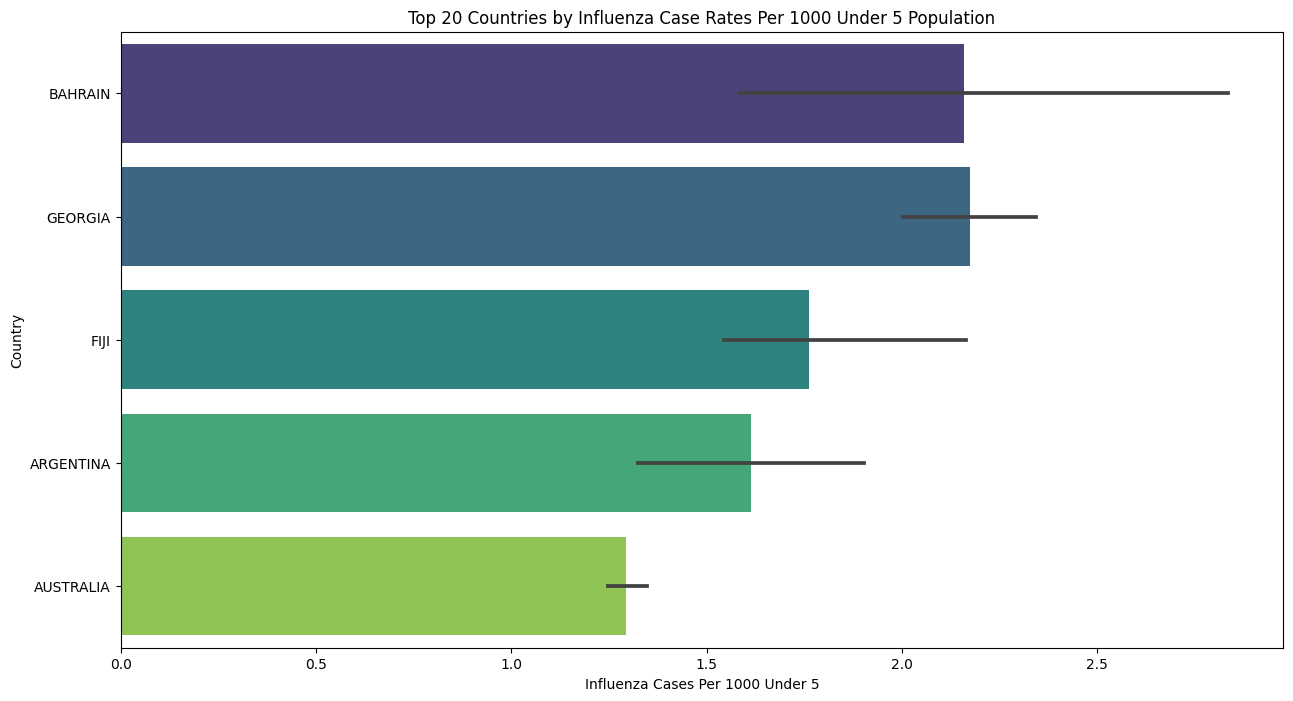

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 20 countries with the highest influenza case rates
top_countries = merged_data_influenza_nutrition.nlargest(20, 'Influenza_Cases_Per_1000_U5')
## plot  bar graph
plt.figure(figsize=(15, 8))
sns.barplot(x='Influenza_Cases_Per_1000_U5', y='Country', data=top_countries, palette='viridis')
plt.title('Top 20 Countries by Influenza Case Rates Per 1000 Under 5 Population')
plt.xlabel('Influenza Cases Per 1000 Under 5')
plt.ylabel('Country')
plt.show()

 Interpretation:
 The Bar chart visualization representing the top 20 countries with the highest influenza case rates per 1000 under-5 population. The analysis incorporates data on influenza cases, nutrition metrics, and demographic information.

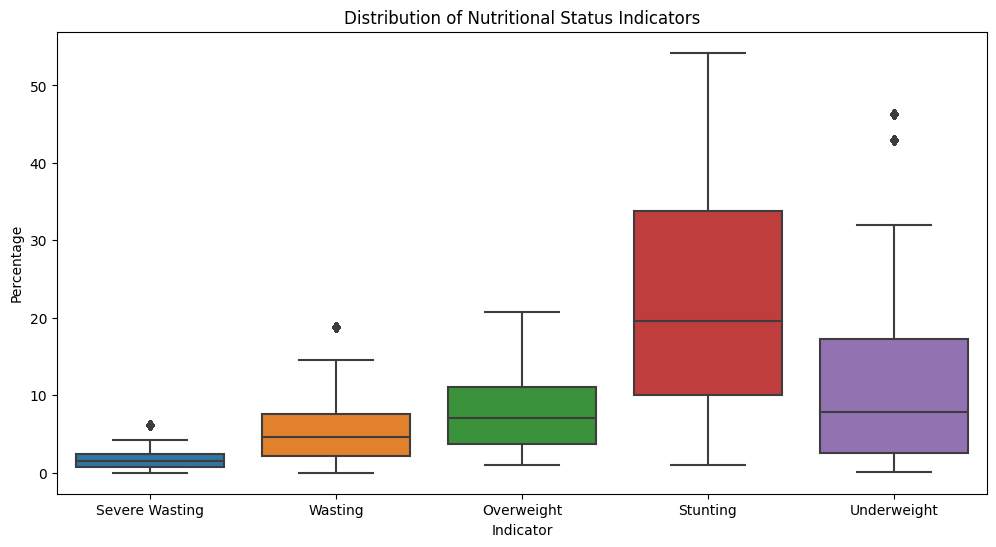

In [129]:
##Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data_influenza_nutrition[['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']])
plt.title('Distribution of Nutritional Status Indicators')
plt.ylabel('Percentage')
plt.xlabel('Indicator')
plt.show()

The distribution of nutritional status indicators can be seen and understood with the use of this box plot, which provides information that can guide public health initiatives and strategies aimed at enhancing general nutritional health.

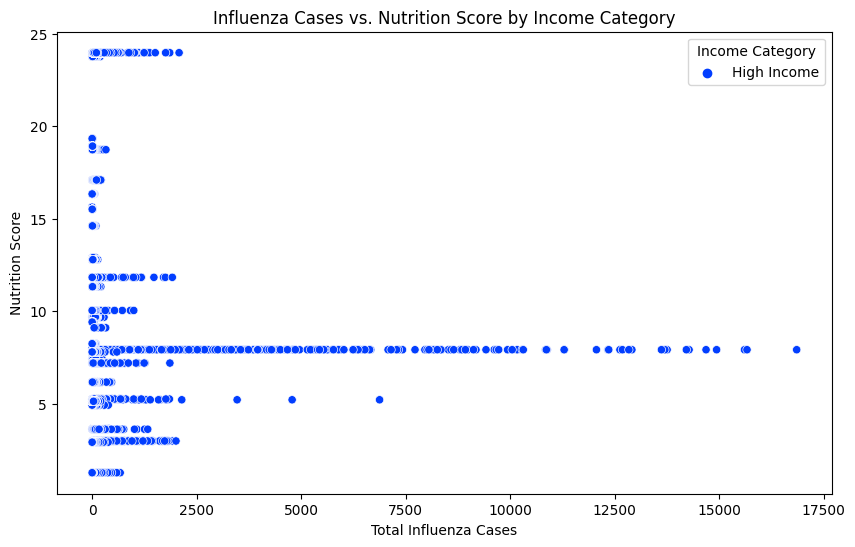

In [130]:
##scatter plot for Influenza cases vs nutrition score by income category.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Cases', y='Nutrition_Score', data=merged_data_influenza_nutrition, hue='Income_Category', palette='bright')
plt.title('Influenza Cases vs. Nutrition Score by Income Category')
plt.xlabel('Total Influenza Cases')
plt.ylabel('Nutrition Score')
plt.legend(title='Income Category', loc='upper right')
plt.show()

 Interpretation:
 A visual examination of the correlation between influenza cases and nutrition score that takes into account the impact of various income categories is offered by the scatter plot. Gaining understanding of possible correlations and directing future research or policy decisions are made easier with the help of this depiction.

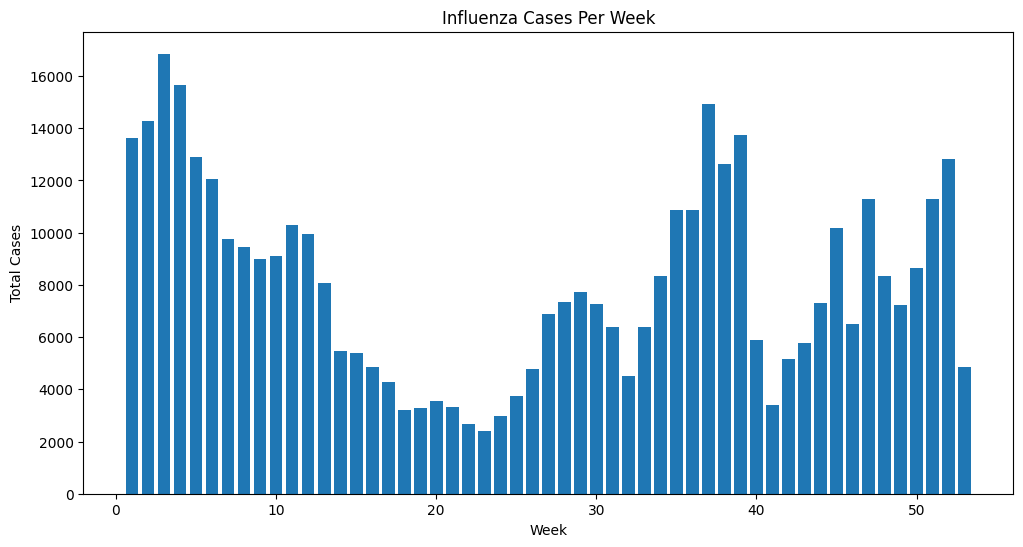

In [131]:
#Bar graph for influenza cases per week
plt.figure(figsize=(12, 6))
plt.bar(influenza_data['Week'], influenza_data['Total_Cases'])  # Replace 'Week' and 'Total_Cases' with your actual column names
plt.title('Influenza Cases Per Week')
plt.xlabel('Week')
plt.ylabel('Total Cases')
plt.show()

  Interpretation:
  A simple and useful way to visualize weekly influenza cases is with a bar graph. Policymakers, researchers, and public health professionals can use this kind of visualization to monitor the temporal distribution of influenza cases and make well-informed decisions about healthcare response and planning.

 Conclusion:

 Thinking back on my work on the "Global Health Impact Analysis" project alone, I've learned a great deal about the intricate relationship between diet and infectious diseases, with a particular emphasis on COVID-19 and influenza. In light of the prevalence and severity of disease, this comprehensive examination of nutrition indicators at the national level has revealed several important conclusions.

My Observation on Nutrition and Disease Correlation: My research shows a strong relationship between nutritional state and the severity and susceptibility of infectious diseases. I discovered that nations with widespread dietary deficits frequently had greater infection rates and more serious outcomes—especially when it came to COVID-19 and influenza.

Understanding Regional Variations and Global Trends: The research I conducted revealed significant regional variations in the impact of disease, which appeared to be innately related to different nutritional profiles. The significance of adjusting health policies and interventions to particular regional contexts was highlighted by this discovery.

Implications for Public Health Policy: My research's results provide compelling evidence in favor of including dietary measures in public health planning and illness prevention. Improving nutritional conditions is, in my opinion, essential to lessening the effects of upcoming pandemics.

Limitations and Future Research Directions: Although my investigation yielded valuable insights, it was also constrained by the disparities in reporting requirements and data quality among nations. In order to better understand the long-term impacts of diet on disease resistance and to investigate the efficacy of certain nutritional therapies, my future research will mostly concentrate on longitudinal studies.

My Individual Appeal to Support Global Health Initiatives: The findings of my analysis emphasize the necessity of funding nutritional programs more heavily as a component of all-encompassing health measures. This is particularly important in areas where there is a high prevalence of disease and nutritional deficits.

In conclusion, this study has strengthened my comprehension of the crucial role nutrition plays in determining the state of world health in the face of infectious diseases. I am convinced that my research helps pave the road for more resilient health systems that can resist the difficulties of rising health threats by establishing a link between illness impact and nutritional status.


